# Derivadas e integrales

En este notebook vamos a entrar al mundo de la derivada y la integral desde un enfoque geométrico. ¿Por qué geométrico? Porque las derivadas e integrales son herramientas que surgieron al intentar entender cosas simples, como pendientes de curvas o el área bajo una curva. Es importante primero visualizarlas, y luego ver cómo pueden aplicarse en diferentes campos científicos.

Notarás que el concepto de derivadas e integrales va mucho más allá de lo abstracto: sirve para resolver problemas reales de cambio y acumulación.

#1. ¿Qué es una derivada? - Un vistazo geométrico
La derivada de una función es simplemente la pendiente de una curva en un punto determinado. Si dibujas una función, como una parábola, su derivada en cada punto es la inclinación de la recta tangente a la curva en ese punto.

###Imaginemos lo siguiente:

Tienes un coche en movimiento, y queremos saber qué tan rápido está yendo en cualquier instante. La derivada de la posición con respecto al tiempo es la velocidad instantánea: mide cómo cambia la posición a medida que pasa el tiempo.

###Concepto gráfico:

Mostraremos cómo la derivada se puede entender con gráficos:

Trazaremos una curva que represente una función, como una parábola.

Luego, dibujaremos la tangente en un punto y veremos su pendiente, que es la derivada de esa curva en ese punto.

En Python, vamos a calcular la derivada numérica usando diferencias finitas para aproximar la pendiente de la recta tangente.

Derivada numérica usando diferencias finitas:

$$ f'(x) \approx \frac{f(x+h) - f(x)}{h} $$


Este método nos da una aproximación de la derivada para funciones que no podemos derivar de manera analítica.

Ejemplo: Derivada de una función de posición
Supongamos que tenemos la siguiente función de posición en el tiempo:

$$ f(t)=t^2  $$


Queremos calcular su derivada numérica para ver la velocidad en cada punto del tiempo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos nuestra función, en este caso una parábola f(t) = t^2
# Esta función representará la posición de un objeto en función del tiempo.
def f(t):
    return t**2

# Definimos la derivada numérica utilizando el método de diferencia finita
# Esta función calcula la derivada numérica de f en un punto t con un paso muy pequeño h.
# La derivada numérica es una aproximación de la tasa de cambio instantánea de la función.
def derivada_numerica(f, t, h=1e-5):
    return (f(t + h) - f(t)) / h  # Fórmula de diferencia finita para la derivada

# Creamos un rango de valores para la variable t (tiempo) usando np.linspace
# np.linspace genera un conjunto de números igualmente espaciados entre -10 y 10, en este caso 100 valores.
t = np.linspace(-10, 10, 100)

# Calculamos la función f(t) para todos los valores de t, esto representará la posición.
posicion = f(t)

# Calculamos la derivada numérica (velocidad) para todos los valores de t usando la función derivada_numerica.
velocidad = derivada_numerica(f, t)

# Ahora vamos a graficar ambas curvas, la posición y la velocidad (derivada numérica).
plt.plot(t, posicion, label="Posición (t^2)")  # Gráfica de la función posición f(t) = t^2
plt.plot(t, velocidad, label="Velocidad (Derivada numérica)", linestyle="--")  # Gráfica de la derivada, con línea punteada (--)

# Etiquetas de los ejes
plt.xlabel("Tiempo (t)")  # Etiqueta para el eje x
plt.ylabel("Posición / Velocidad")  # Etiqueta para el eje y

# Añadimos una leyenda para diferenciar ambas curvas
plt.legend()

# Título de la gráfica para darle contexto
plt.title("Derivada numérica de la posición para una parábola")

# Mostramos la gráfica
plt.show()


###Explicación de algunas partes clave:

`np.linspace(-10, 10, 100)`: Genera 100 valores igualmente espaciados entre -10 y 10. Esto es útil para evaluar funciones continuas, ya que nos da muchos puntos en ese rango para observar.

`derivada_numerica(f, t, h=1e-5)`: Calcula la derivada numérica de la función usando la fórmula de diferencia finita con un pequeño valor de `h`. Esto es una aproximación de la derivada en cada punto `t`.

`linestyle="--"`: Esto define que la curva de la velocidad se dibuje con una línea discontinua (punteada). Esto permite diferenciar visualmente entre las curvas de posición y velocidad.

`plt.legend()`: Añade una leyenda a la gráfica que muestra qué línea corresponde a la posición y cuál a la velocidad.

###¿Cuándo usamos derivadas?
Algunos casos son:

En **física**, para obtener la velocidad de un objeto cuando conocemos su posición en el tiempo.

En **computación**, el gradiente descendente (una técnica que veremos más adelante) usa derivadas para minimizar funciones y entrenar modelos.

En **biología**, para medir la tasa de crecimiento de una población o cambios en concentraciones de sustancias en procesos químicos.

#2. ¿Qué es una integral? - Un enfoque geométrico
Una integral es desde cierto punto de vista lo opuesto a una derivada.
Geométricamente, una derivada nos da la pendiente de una curva en un punto, la integral nos da el área bajo la curva.

###¿Cómo lo interpretamos? Imagina que necesitas calcular el área de un campo irregular: la integral te permite dividir ese campo en pequeños rectángulos, sumarlos y obtener el área total.

###Concepto gráfico:
Vamos a visualizar esto gráficamente. Dibujaremos una función y rellenaremos el área bajo la curva para que entiendas cómo la integral es simplemente una suma acumulada de esas áreas.

###Integral numérica usando el método del trapecio:
La integral definida de f(x) entre a y b es:

$$ \int_a^b f(x) \, dx $$

Numéricamente, podemos aproximarla con el **método del trapecio**:

$$
\int_a^b f(x) \, dx \approx \frac{h}{2} \left[ f(a) + 2f(a + h) + 2f(a + 2h) + \cdots + f(b) \right]
$$

\\
###Ejemplo: Integral numérica para calcular el área bajo una curva

Vamos a usar el método del trapecio para aproximar el área bajo una curva.



In [ ]:
from scipy.integrate import trapz
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x) que queremos integrar
# En este caso, es la función seno (sin), que es periódica y tiene aplicaciones en física y matemáticas
def f(x):
    return np.sin(x)

# Definimos el rango de integración. Usamos np.linspace para crear un arreglo de 100 puntos
# igualmente espaciados entre 0 y π (pi). np.pi es una constante que representa el valor de π.
x = np.linspace(0, np.pi, 100)

# Calculamos la integral numérica usando el método del trapecio (trapz).
# La función trapz de scipy integra la función f(x) en el rango definido por x.
# Es un método numérico que aproxima el área bajo la curva de f(x).
area = trapz(f(x), x)

# Graficamos la función y el área bajo la curva
plt.plot(x, f(x), label="f(x) = sin(x)")  # Graficamos f(x) = sin(x)

# Usamos fill_between para sombrear el área bajo la curva. Esto le da una representación visual a la integral.
plt.fill_between(x, f(x), alpha=0.3)

# Añadimos el título y el valor del área bajo la curva calculada numéricamente
plt.title(f"Área bajo la curva = {area}")

# Etiquetas para los ejes x e y
plt.xlabel("x")
plt.ylabel("f(x)")

# Mostramos la leyenda que indica qué representa la gráfica
plt.legend()

# Finalmente mostramos el gráfico
plt.show()

###Explicación de algunos elementos:

`scipy.integrate.trapz`: Esta función implementa el método del trapecio, que es una forma numérica de calcular integrales aproximando el área bajo una curva dividiendo la curva en pequeños trapecios. Es útil cuando no se puede calcular la integral analíticamente.

`np.sin(x)`: Esto es simplemente la función seno aplicada al array `x`. `numpy (np)` proporciona muchas funciones matemáticas predefinidas, entre ellas sin, que aplica la función seno a cada valor del array `x`.

`trapz(f(x), x)`: Aquí calculamos la integral numérica de la función `f(x) (seno)` en el rango definido por `x`, utilizando el método del trapecio.

`plt.fill_between(x, f(x), alpha=0.3)`: Esta función se utiliza para rellenar el área entre la curva `f(x)` y el eje `x`. En este caso, se utiliza para destacar visualmente el área bajo la curva (integral).

`np.pi`: Es una constante que representa el valor de `π` en el módulo numpy. Lo usamos como límite superior del rango en `x`.

Este código genera una gráfica de la función seno y muestra visualmente el área bajo la curva entre `0` y `π`. Además, calcula y muestra el valor de esa área utilizando el método del trapecio.

###¿Cuándo usamos integrales?
Algunos casos son:

En **física**, para calcular el desplazamiento total cuando conocemos la velocidad en el tiempo.

En **biología**, para calcular la cantidad total de sustancias acumuladas en un proceso biológico.

En **actuaría**, para calcular el valor presente neto acumulado de flujos de efectivo futuros.

#3. Ejemplos
##3.1 Ejemplo de derivada: tasa de crecimiento de un tumor

En medicina, una de las aplicaciones de las derivadas es analizar la tasa de crecimiento de un tumor a lo largo del tiempo.

**Planteamiento:**

Imaginemos que tenemos una función V(t) que representa el volumen del tumor en función del tiempo t (en semanas). Si queremos saber qué tan rápido está creciendo el tumor en un momento específico, usamos la derivada.

Supongamos que el volumen del tumor está dado por la función
$$ V(t) = 2t^2 + 3t $$
, donde t está en semanas y V(t) en centímetros cúbicos.

La derivada V'(t) nos dará la **tasa de crecimiento** del tumor en centímetros cúbicos por semana.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función que representa el volumen del tumor
def V(t):
    return 2*t**2 + 3*t

# Derivada numérica de la función V(t)
def derivada_numerica(f, t, h=1e-5):
    return (f(t + h) - f(t)) / h

# Definimos el rango de tiempo en semanas
t = np.linspace(0, 10, 100)

# Calculamos el volumen del tumor y su tasa de crecimiento
volumen = V(t)
tasa_crecimiento = derivada_numerica(V, t)

# Graficamos el volumen y la tasa de crecimiento
plt.plot(t, volumen, label="Volumen del tumor")
plt.plot(t, tasa_crecimiento, label="Tasa de crecimiento", linestyle="--")
plt.xlabel("Tiempo (semanas)")
plt.ylabel("Volumen / Tasa de Crecimiento")
plt.legend()
plt.title("Tasa de crecimiento del tumor")
plt.show()

##3.2 Ejemplo de integral: consumo de oxígeno en un organismo
**Planteamiento:**

En biología, a menudo se mide el consumo de oxígeno de un organismo a lo largo del tiempo. Si la tasa de consumo de oxígeno está modelada por una función
𝑓(𝑡)
que describe el consumo en litros por minuto, podemos utilizar una integral para calcular el consumo total de oxígeno durante un período determinado.

Supongamos que la función que describe el consumo de oxígeno es:

𝑓(𝑡)=sin⁡(𝑡)

Queremos calcular el consumo total de oxígeno durante los primeros 5 minutos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid  # También podemos usar trapezoid en lugar de trapz.

# Definimos la función de consumo de oxígeno.
# f(t) = sin(t) representa el consumo de oxígeno en función del tiempo (t).
def f(t):
    return np.sin(t)

# Definimos el rango de tiempo (t) en minutos.
# np.linspace genera 100 puntos entre 0 y 5 minutos.
t = np.linspace(0, 5, 100)

# Calculamos la integral numérica usando la regla del trapecio (trapezoid).
# Calculamos el área bajo la curva, que es el consumo total de oxígeno en ese tiempo.
consumo_total = trapezoid(f(t), t)

# Graficamos la función de consumo de oxígeno y el área bajo la curva.
plt.plot(t, f(t), label="Tasa de Consumo de Oxígeno (litros/minuto)")
# fill_between se usa para sombrear el área bajo la curva entre la función f(t) y el eje x.
plt.fill_between(t, f(t), alpha=0.3)
plt.title(f"Consumo Total de Oxígeno = {consumo_total:.2f} litros")
plt.xlabel("Tiempo (minutos)")
plt.ylabel("Consumo de Oxígeno (litros/minuto)")
plt.legend()
plt.show()

# Imprimimos el consumo total de oxígeno en los primeros 5 minutos.
print(f"Consumo total de oxígeno en 5 minutos: {consumo_total:.2f} litros")


Interpretación:
La integral nos permite calcular el consumo total de oxígeno durante los primeros 5 minutos, sumando el área bajo la curva que representa la tasa de consumo.

Interpretación del resultado: El área bajo la curva que describe la tasa de consumo de oxígeno es aproximadamente
Consumo Total=3.18litros. Esto significa que, durante los primeros 5 minutos, el organismo ha consumido aproximadamente 3.18 litros de oxígeno. Este tipo de cálculo es útil para monitorear las funciones metabólicas de organismos vivos.

#4. Ejercicios de práctica
##Ejercicio 4.1: Derivada - algoritmos de búsqueda binaria
En ciencias de la computación, la derivada puede ser útil para entender la eficiencia de un algoritmo. Por ejemplo, el algoritmo de búsqueda binaria tiene una complejidad temporal que depende del tamaño de la entrada
𝑛. La función que describe el número de operaciones en el peor caso es:
𝑇(𝑛)=log⁡2(𝑛)
donde
𝑇(𝑛) es el número de operaciones necesarias para encontrar un elemento en una lista de tamaño
𝑛
n. Queremos calcular la tasa de cambio del número de operaciones respecto al tamaño de la lista.

**Instrucciones:**

Completa el siguiente código para calcular la tasa de cambio de las operaciones de búsqueda binaria a medida que cambia el tamaño de la lista.

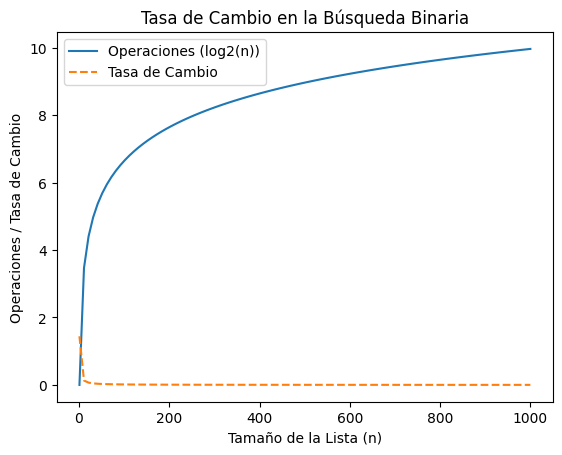

Tasa de cambio en n=100: 0.0144 operaciones por elemento


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función de la complejidad temporal
def T(n):
    return np.log2(n)

# Derivada numérica de la función
def tasa_cambio(f, n, h=1e-5):
    return (_(_ + _) - _(_)) / _     #Completa la tasa de cambio, recuerda la derivada.

# Rango de tamaños de la lista
n = np.linspace(1, 1000, 100)

# Calculamos el número de operaciones y la tasa de cambio
operaciones = T(n)
tasa = tasa_cambio(T, n)

# Graficamos los resultados
plt.plot(n, operaciones, label="Operaciones (log2(n))")
plt.plot(n, tasa, label="Tasa de Cambio", linestyle="--")
plt.xlabel("Tamaño de la Lista (n)")
plt.ylabel("Operaciones / Tasa de Cambio")
plt.legend()
plt.title("Tasa de Cambio en la Búsqueda Binaria")
plt.show()

# Calculamos la tasa de cambio en n=100
n_valor = 100
tasa_n_valor = tasa_cambio(T, n_valor)
print(f"Tasa de cambio en n=100: {tasa_n_valor:.4f} operaciones por elemento")


##Ejercicio 4.2: Integral - valor esperado de una distribución exponencial
En actuaría, el valor esperado de una distribución de probabilidad es un concepto fundamental. Si una variable aleatoria tiene una distribución exponencial con función de densidad:
$$𝑓(𝑥)=𝜆^{𝑒−𝜆𝑥}$$
donde
𝜆=0.5, queremos calcular el valor esperado
𝐸[𝑋], que es la integral de
𝑥𝑓(𝑥) en el intervalo de
0 a ∞.

**Instrucciones:**

Completa el siguiente código para calcular el valor esperado de la distribución exponencial.

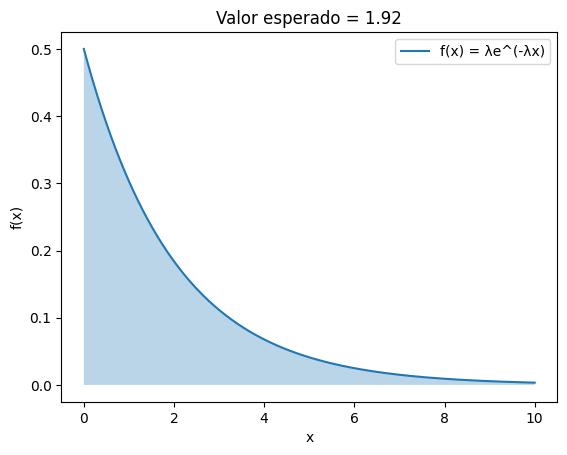

Valor esperado de la distribución exponencial: 1.92


In [ ]:
import numpy as __
import matplotlib.______ as plt
from scipy._________ import _________  # Importamos la función trapezoid para integrar numéricamente

# Definimos la función de densidad de probabilidad
lambda_param = 0.5  # Definimos el parámetro lambda para la distribución exponencial
def f(x):
    return lambda_param * np.exp(-lambda_param * x)  # Esta es la fórmula de la distribución exponencial, f(x) = λe^(-λx)

# Definimos el rango de x (hasta un valor suficientemente grande)
x = np.linspace(0, 10, 1000)  # np.linspace genera 1000 valores equiespaciados entre 0 y 10 para x

# Calculamos la integral numérica usando trapezoid
valor_esperado = _________(x * f(x), x)  # Calculamos la integral de x*f(x) usando el método del trapecio

# Graficamos la función de densidad
plt.plot(x, f(x), label="f(x) = λe^(-λx)")  # Graficamos la función de densidad
plt.fill_between(x, f(x), alpha=0.3)  # Rellenamos el área bajo la curva para destacar la integral
plt.title(f"Valor esperado = {valor_esperado:.2f}")  # Mostramos el valor esperado en el título
plt.xlabel("x")  # Etiqueta del eje X
plt.ylabel("f(x)")  # Etiqueta del eje Y
plt.______()  # Mostramos la leyenda en la gráfica
plt.show()  # Mostramos la gráfica

_____(f"Valor esperado de la distribución exponencial: {valor_esperado:.2f}")  # Imprimimos el resultado de la integral


##Ejercicio 4.3: Derivada - optimización de inventario con el modelo EOQ
El Modelo EOQ (Economic Order Quantity) o Cantidad Económica de Pedido es un modelo utilizado en logística y administración de inventarios. Su objetivo es determinar la cantidad óptima de productos que una empresa debería pedir para minimizar los costos totales asociados con el inventario. Estos costos incluyen:

Costos de Pedido: Representan el costo fijo asociado a realizar un pedido, como los costos de transporte o procesamiento de órdenes. Mientras más productos pidas en un solo pedido, menos veces necesitarás hacer nuevos pedidos, por lo que estos costos disminuyen a medida que incrementas
𝑄, la cantidad pedida.

Costos de Almacenamiento: Reflejan el costo de mantener productos en inventario, como los costos de almacenamiento y deterioro. Estos costos aumentan a medida que pides más cantidad de producto, ya que necesitarás más espacio y tiempo para almacenarlos.

La función de costos totales combina ambos tipos de costos, y tiene una forma de "U", donde hay un punto mínimo que representa la cantidad
𝑄 óptima para minimizar los costos totales.

La Fórmula de los Costos Totales:
La ecuación 𝐶(𝑄) para los costos totales es la siguiente:

$$C(Q) = \frac{D}{Q}S + \frac{Q}{2}H$$

Donde:

𝐷 es la demanda anual.

𝑆 es el costo de realizar un pedido.

𝐻 es el costo de mantener un artículo en inventario durante un año.

𝑄 es la cantidad de productos pedidos.

El objetivo es encontrar la cantidad 𝑄 que minimiza los costos totales.

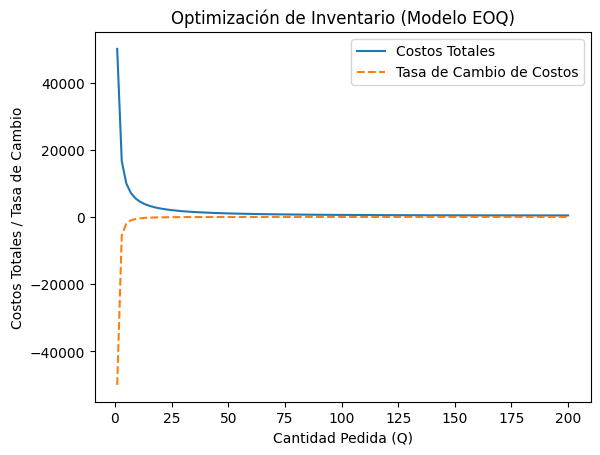

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parámetros
D = 1000   # Demanda anual (en unidades)
S = 50     # Costo por pedido (en $)
H = 2      # Costo de almacenamiento por unidad al año (en $)

# Definimos la función de costo total en función de la cantidad Q
def costo_total(Q):
    return (_ / _) * _ + (_ / _) * _  #Ingresa la función

# Derivada numérica para encontrar el cambio de costo
def derivada_numerica(f, Q, h=1e-5):
    return _____________________      #Completa la función derivada

# Rango de cantidades para Q
Q = np.linspace(1, 200, 100)

# Calculamos los costos totales y la derivada
costos = costo_total(Q)
tasa_cambio = _________________(costo_total, Q)  #Llama a la función para obtener la tasa de cambio

# Graficamos los costos y la tasa de cambio
plt.plot(Q, costos, label="Costos Totales")
plt.plot(Q, tasa_cambio, label="Tasa de Cambio de Costos", linestyle="--")
plt.xlabel("Cantidad Pedida (Q)")
plt.ylabel("Costos Totales / Tasa de Cambio")
plt.legend()
plt.title("Optimización de Inventario (Modelo EOQ)")
plt.show()

###Interpretación del gráfico:
**Curva de costos totales (línea azul):**

Muestra cómo cambian los costos totales conforme incrementa
𝑄. Al principio, los costos totales son altos cuando la cantidad pedida es pequeña (porque haces muchos pedidos). A medida que
𝑄 aumenta, los costos totales disminuyen y luego empiezan a aumentar nuevamente debido a los altos costos de almacenamiento.

El punto más bajo de la curva azul es el punto óptimo de pedido, donde los costos totales son los más bajos posibles.

**Curva de tasa de cambio de costos (línea naranja punteada):**

Es la derivada de los costos totales con respecto a
𝑄. Esta curva muestra la tasa de cambio de los costos a medida que ajustas 𝑄.

Cuando la curva cruza el eje horizontal (cuando la tasa de cambio es cero), encontramos el punto donde los costos dejan de disminuir, es decir, el punto de optimización de los costos totales.

**¿Cómo interpretar 𝑄 en este contexto?**

𝑄 es el parámetro que ajustamos para encontrar el equilibrio entre hacer muchos pedidos pequeños o pocos pedidos grandes. La gráfica te muestra cómo los costos totales dependen de esta cantidad. Al graficar los costos totales y la tasa de cambio de costos, podemos visualizar el punto óptimo donde una empresa debe pedir una cantidad que minimiza tanto los costos de pedido como los costos de almacenamiento.

Este concepto es útil para la administración eficiente de inventarios y asegurar que una empresa no incurra en costos excesivos por hacer muchos pedidos o por tener demasiado inventario almacenado.

##Ejercicio 4.4: Integral - cálculo de la media en ciencias actuariales
En ciencias actuariales, la esperanza matemática (o valor esperado) de una función de densidad de probabilidad describe el valor promedio de una variable aleatoria. Vamos a calcular el valor esperado de una distribución de densidad
𝑓(𝑥), que representa el riesgo de una inversión.

**Planteamiento:**

Dada una función de densidad de probabilidad
$$𝑓(𝑥)=3𝑥^2$$
  en el intervalo [0, 1], calcular el valor esperado de la inversión:

$$ E[X] = \int_0^1 x \cdot f(x) \, dx $$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

# Definimos la función de densidad de probabilidad
def f(x):
    return ________    #Ingresa la función
# Definimos el rango de x (intervalo de la inversión)
x = np.linspace(0, 1, 100)

# Calculamos la integral numérica para el valor esperado
valor_esperado = ________(_ * ____, _) #Define la integral de x por f(x) con respecto a x con ayuda de la funcion trapezoid

# Graficamos la función de densidad y el área bajo la curva
plt.plot(x, f(x), label=r"$f(x) = 3x^2$")
plt.fill_between(x, f(x), alpha=0.3, label="Área bajo la curva")
plt.title(f"Valor esperado = {valor_esperado:.2f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

print(f"Valor esperado de la inversión: {valor_esperado:.2f}")


En actuaría, esta medida nos da una idea del valor promedio de los rendimientos futuros de una inversión, útil para calcular el riesgo.

#Conclusión
En este notebook, hemos explorado de manera práctica y conceptual dos herramientas fundamentales del cálculo: la derivada y la integral. A través de ejemplos interactivos, mostramos cómo estas herramientas son esenciales no solo en el estudio teórico de las matemáticas, sino también en una amplia gama de aplicaciones del mundo real, que incluyen áreas como la medicina, la ingeniería, la economía y las ciencias computacionales.

###Puntos clave:
**Derivadas:**
Aprendimos cómo la derivada mide la tasa de cambio de una función y cómo se puede aplicar para modelar situaciones tan diversas como la tasa de crecimiento de un tumor o la optimización de funciones.

**Integrales:**
Estudiamos cómo la integral nos permite calcular el área bajo una curva, lo que tiene aplicaciones en física, economía y estadística, entre otras áreas. Nos adentramos en el método del trapecio para resolver integrales numéricas.

\\
Este notebook ha servido como una introducción para comenzar a visualizar cómo las matemáticas abstractas toman forma concreta cuando se aplican a problemas del mundo real. Además, ofrecimos una experiencia práctica usando Python y bibliotecas como NumPy y SciPy para calcular derivadas e integrales numéricas.

\\
Con esto en mente, prueben practicar con más problemas de cálculo aplicado para fortalecer su comprensión y afinar sus habilidades en la resolución numérica de problemas utilizando Python.